# MLSP 2014 Schizophrenia Classification Challenge

For details, see https://www.kaggle.com/c/mlsp-2014-mri/overview

## submission #842079

In [1]:
from os.path import join

import numpy as np
import pandas as pd

### Data

For more details, see https://www.kaggle.com/c/mlsp-2014-mri/data.

Labels for the training set. The labels are indicated in the "Class" column. 0 = 'Healthy Control', 1 = 'Schizophrenic Patient'

In [2]:
labels = pd.read_csv(join('Train', 'train_labels.csv'), index_col=0)
labels

,Class
Id,
120873,1
135376,0
139149,0
146791,0
153870,1
...,...
934330,0
950671,0
963924,1


#### About FNC Features

Functional Network Connectivity (FNC) are correlation values that summarize the overall connection between independent brain maps over time. Therefore, the FNC feature gives a picture of the connectivity pattern over time between independent networks (or brain maps). The provided FNC information was obtained from functional magnetic resonance imaging (fMRI) from a set of schizophrenic patients and healthy controls at rest, using group independent component analysis (GICA). The GICA decomposition of the fMRI data resulted in a set of brain maps, and corresponding timecourses. These timecourses indicated the activity level of the corresponding brain map at each point in time. The FNC feature are the correlations between these timecourses. In a way, FNC indicates a subject's overall level of 'synchronicity' between brain areas. Because this information is derived from functional MRI scans, FNCs are considered a functional modality feature (i.e., they describe patterns of the brain function). More about FNCs can be found here: [FNC paper](http://cercor.oxfordjournals.org/content/early/2012/11/09/cercor.bhs352.abstract).

In [3]:
FNC_train = pd.read_csv(join('Train', 'train_FNC.csv'), index_col=0)
FNC_train

,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,FNC10,...,FNC369,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378
Id,,,,,,,,,,,,,,,,,,,,,
120873,0.343120,0.045761,-0.131120,0.15034,0.180820,0.289160,0.069545,-0.052489,0.124000,0.477620,...,0.187430,0.163770,0.17686,0.074728,0.148600,0.343230,0.17565,0.520350,0.030613,0.307740
135376,0.287900,0.102570,-0.323430,-0.22776,0.123280,0.367020,-0.084040,0.038793,-0.006287,0.101690,...,0.598340,-0.477880,0.26634,0.582940,-0.041272,0.630050,0.70314,0.363830,-0.207880,0.641380
139149,0.245850,0.216620,-0.124680,-0.35380,0.161500,-0.002032,-0.133020,-0.035222,0.259040,-0.045302,...,0.228660,-0.000816,0.25860,0.280450,-0.644640,0.332440,0.87074,-0.109730,-0.679160,0.323160
146791,0.420900,0.331380,0.244530,0.17167,0.592230,0.431050,0.280290,0.289620,0.356800,0.286340,...,0.428810,0.711570,0.56593,0.248560,0.153860,0.093171,0.62556,0.603910,-0.058301,0.107790
153870,-0.146210,-0.468630,-0.528800,-0.50381,-0.510520,-0.029113,-0.015192,0.360170,0.005944,0.024801,...,0.416880,-0.435600,0.32104,0.392960,-0.842430,0.425080,0.86509,-0.312810,-0.829640,0.243070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934330,-0.148470,-0.401520,-0.474630,-0.53253,0.293510,-0.111720,-0.544720,0.240320,0.156540,0.194410,...,-0.231000,0.238880,-0.17473,0.095453,-0.708160,-0.026044,0.51899,0.265310,-0.446470,0.130690
950671,0.074459,-0.240680,-0.367120,-0.34688,-0.052563,0.252690,-0.382160,0.144010,0.310350,0.174190,...,0.460420,-0.286550,0.11393,0.412760,-0.813060,0.415860,0.81388,-0.248860,-0.546160,0.366960
963924,0.435160,0.225050,0.057172,-0.35348,0.447420,0.183180,0.122420,0.024561,0.404830,0.006682,...,-0.025409,0.269110,0.51604,0.053609,-0.484620,-0.437720,0.38378,0.556660,-0.476940,0.026923


#### About SBM Loadings

Source-Based Morphometry (SBM) loadings correspond to the weights of brain maps obtained from the application of independent component analysis (ICA) on the gray-matter concentration maps of all subjects. Gray-matter corresponds to the outer-sheet of the brain; it is the brain region in which much of the brain signal processing actually occurs. In a way, the concentration of gray-matter is indicative of the "computational power" available in a certain region of the brain. Processing gray-matter concentration maps with ICA yields independent brain maps whose expression levels (i.e., loadings) vary across subjects. Simply put, a near-zero loading for a given ICA-derived brain map indicates that the brain regions outlined in that map are lowly present in the subject (i.e., the gray-matter concentration in those regions are very low in that subject). Because this information is derived from structural MRI scans, SBM loadings are considered a structural modality feature (i.e., they describe patterns of the brain structure). More about SBM loadings can be found here: [SBM paper](http://www.ncbi.nlm.nih.gov/pubmed/22470337).

In [4]:
SBM_train = pd.read_csv(join('Train', 'train_SBM.csv'), index_col=0)
SBM_train

,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,...,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
Id,,,,,,,,,,,,,,,,,,,,,
120873,0.725065,-0.639254,0.353069,-0.981707,-1.419971,-0.441321,-0.264192,0.711579,0.641798,0.339658,...,-0.078220,-0.982331,1.070363,0.220316,0.776855,-2.022404,1.203256,1.083516,0.564201,-0.002006
135376,-1.328855,0.502970,0.013232,1.128496,-0.070738,0.398476,-0.466051,-0.435455,0.342847,-0.672254,...,0.989571,-0.057543,0.371701,-0.513081,-0.457550,1.476216,0.381052,0.163436,0.403782,-0.295125
139149,0.732268,-1.241554,0.654942,-0.289216,0.158316,0.029165,1.439242,-0.832816,1.285468,-2.132901,...,-0.257114,0.597229,1.220756,-0.059213,-0.435494,-0.092971,1.090910,-0.448562,-0.508497,0.350434
146791,-0.343917,-1.052519,-1.150521,0.765989,0.923129,0.674052,-0.492673,1.282388,-1.914583,-1.269851,...,-0.295110,0.829697,-0.450726,-0.791032,-1.115821,-0.022296,-0.245844,-0.705539,0.061344,0.448966
153870,-0.208685,-0.562697,-0.362164,1.025571,0.151690,-0.130410,-1.105922,0.502029,-0.097735,1.561833,...,1.342273,-0.978412,0.158492,0.889753,0.795368,0.738788,0.475415,2.340384,2.516038,-0.551440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934330,-0.271233,-0.441043,-2.241210,-2.005569,0.118265,-0.665987,-0.515736,0.526771,-0.953451,-0.063827,...,0.512424,0.826910,-0.225792,0.369724,-0.565693,-0.045074,1.094329,-0.345906,-0.014453,0.567717
950671,-0.703690,-0.173818,-1.322392,0.180619,0.106367,0.975193,-0.933527,-0.501655,-0.376133,-0.373754,...,-0.430485,0.482055,0.073327,-0.455141,-0.681228,0.948131,0.443656,0.092495,0.683039,0.977018
963924,-1.925477,-1.256874,0.731867,-1.462804,-0.486504,-0.251175,-0.523021,-0.408961,0.299555,-1.448230,...,0.314668,-0.114078,-0.476524,-0.556896,0.505738,0.873278,0.040048,0.211690,0.536933,-0.424864


### Feature selection

In [5]:
from sklearn.feature_selection import SelectKBest, f_classif

In [6]:
FNC_selector = SelectKBest(f_classif).fit(FNC_train, labels['Class'])
SBM_selector = SelectKBest(f_classif).fit(SBM_train, labels['Class'])

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

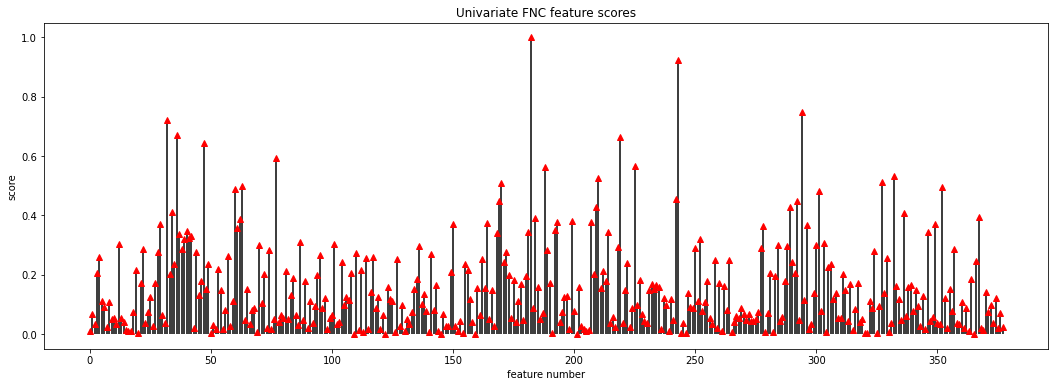

In [28]:
indices = np.arange(FNC_train.shape[-1])
FNC_scores = -np.log10(FNC_selector.pvalues_)
FNC_scores /= FNC_scores.max()

fig = plt.figure(figsize=(18,6))
plot = fig.add_subplot(111, xlabel='feature number', ylabel='score', title='Univariate FNC feature scores')
plot.plot(indices, FNC_scores, 'r^')
plot.vlines(indices, [0], FNC_scores)
plt.show()

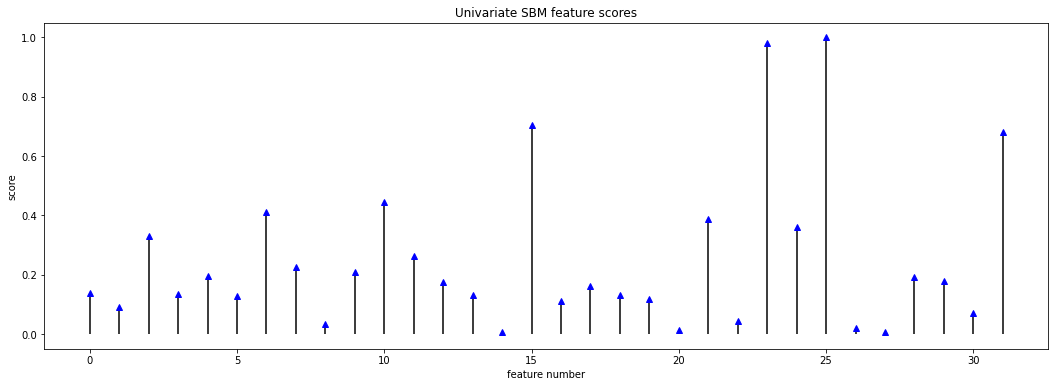

In [29]:
indices = np.arange(SBM_train.shape[-1])
SBM_scores = -np.log10(SBM_selector.pvalues_)
SBM_scores /= SBM_scores.max()

fig = plt.figure(figsize=(18,6))
plot = fig.add_subplot(111, xlabel='feature number', ylabel='score', title='Univariate SBM feature scores')
plot.plot(indices, SBM_scores, 'b^')
plot.vlines(indices, [0], SBM_scores)
plt.show()

For this submission I selected 60 FNC features and 8 SBM features.

In [13]:
FNC_selector.k = 60
SBM_selector.k = 8

In [16]:
top_60_FNC_features= FNC_train.columns[np.argsort(FNC_scores)][range(len(FNC_scores)-60, len(FNC_scores))]
top_8_SBM_features = SBM_train.columns[np.argsort(SBM_scores)][range(len(SBM_scores)- 8, len(SBM_scores))]

### Training classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
X_train = np.hstack((
    FNC_selector.transform(FNC_train),
    SBM_selector.transform(SBM_train),
))
y_train = labels['Class']

In [19]:
clf = KNeighborsClassifier(n_neighbors=35).fit(X_train, y_train)

In [20]:
print(clf.score(X_train, y_train))

0.872093023255814
